<a href="https://colab.research.google.com/github/susanaf2000/Deep-Learning_Project/blob/main/src/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/susanaf2000/Deep-Learning_Project.git

fatal: destination path 'Deep-Learning_Project' already exists and is not an empty directory.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

In [5]:
base_dir = "/content/Deep-Learning_Project/data/raw/"

#check the content of the extracted flder
dog_dir = os.path.join(base_dir, "dog")
cat_dir = os.path.join(base_dir, "cat")
dog_files = os.listdir(dog_dir)
cat_files = os.listdir(cat_dir)

### Load and display the nine images

1. Dogs

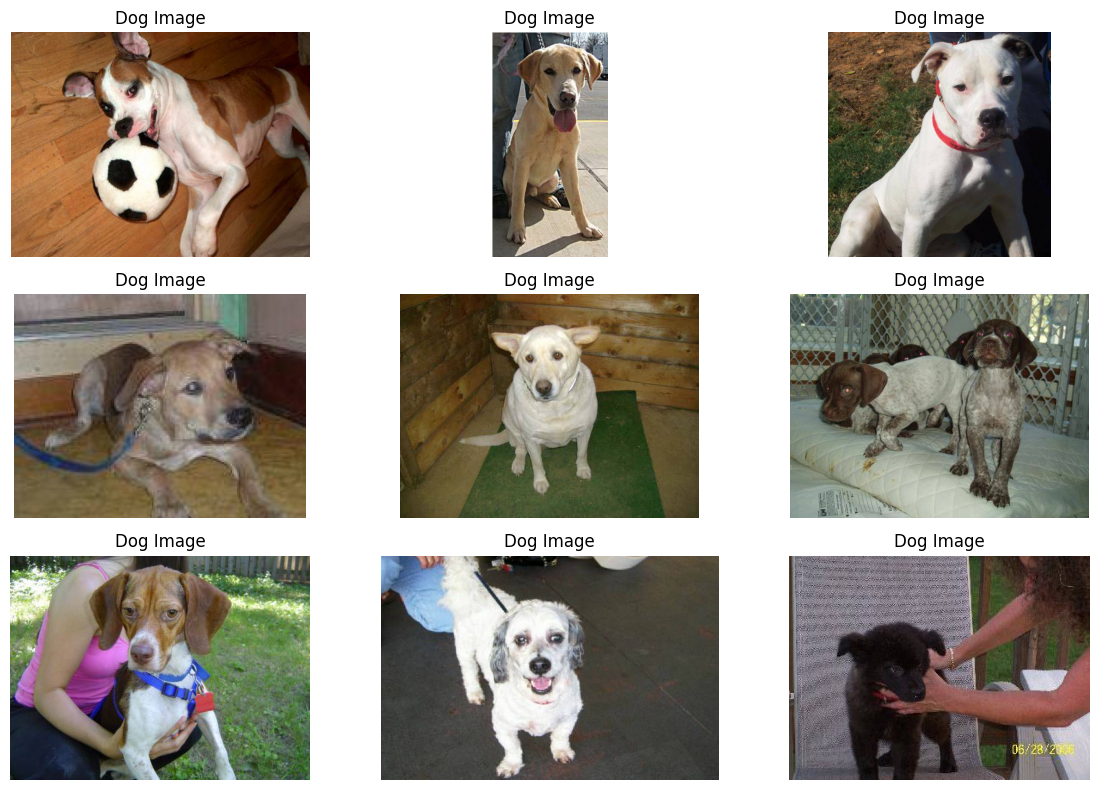

In [6]:
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_dir, dog_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

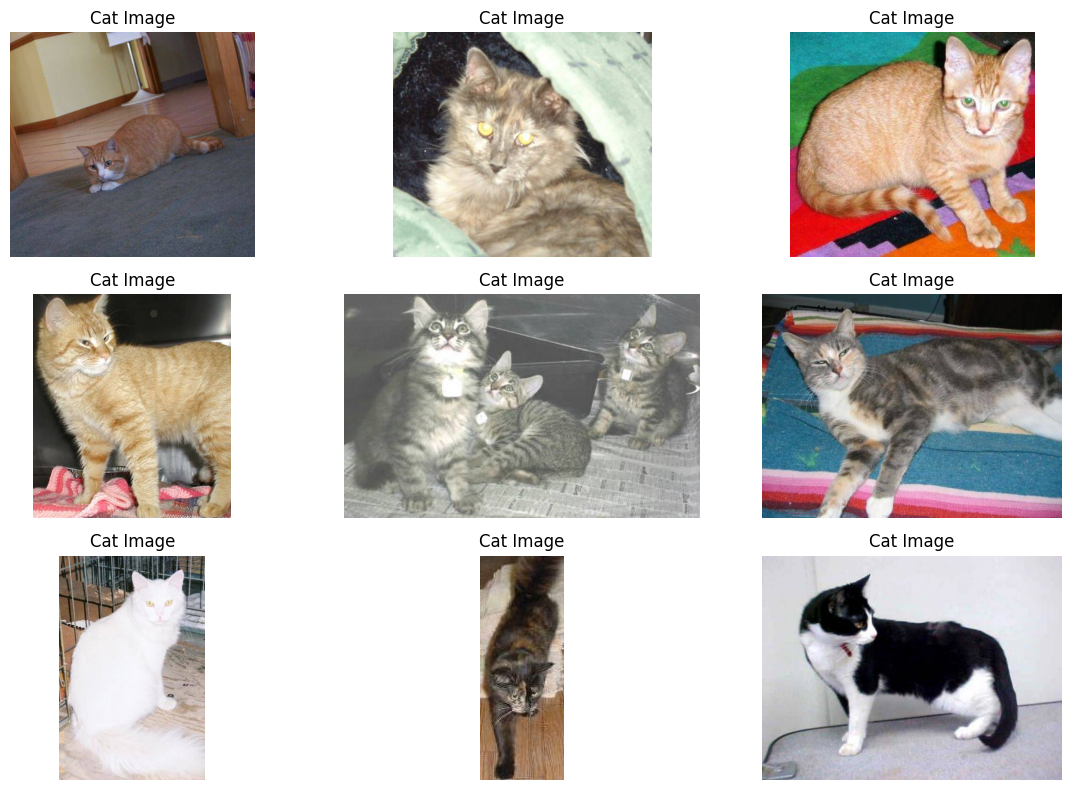

In [7]:
# Load the first nine cat images
cat_images = []
for i in range(min(9, len(cat_files))):  # Limit to available cat images
    img_path = os.path.join(cat_dir, cat_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(len(cat_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

In [8]:
# Define a few rules for DataGen
train_dir = "/content/Deep-Learning_Project/data/raw/"
test_dir = "/content/Deep-Learning_Project/data/raw/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
trdata = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)

# Test Data Generation
tsdata = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ["test1"]
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=2, activation='softmax'))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [11]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(trdata, epochs = 10, validation_data=tsdata)


Epoch 1/10
782/782 [==============================] - 67s 79ms/step - loss: 1.7886 - accuracy: 0.6830 - val_loss: 2.1550 - val_accuracy: 0.5319
Epoch 2/10
782/782 [==============================] - 60s 77ms/step - loss: 0.4443 - accuracy: 0.7956 - val_loss: 2.2839 - val_accuracy: 0.3322
Epoch 3/10
782/782 [==============================] - 62s 79ms/step - loss: 0.3308 - accuracy: 0.8568 - val_loss: 2.8256 - val_accuracy: 0.4022
Epoch 4/10
782/782 [==============================] - 60s 77ms/step - loss: 0.2390 - accuracy: 0.9010 - val_loss: 3.7203 - val_accuracy: 0.5581
Epoch 5/10
782/782 [==============================] - 60s 77ms/step - loss: 0.1537 - accuracy: 0.9410 - val_loss: 4.3078 - val_accuracy: 0.5235
Epoch 6/10
782/782 [==============================] - 61s 78ms/step - loss: 0.1086 - accuracy: 0.9594 - val_loss: 5.1229 - val_accuracy: 0.4547
Epoch 7/10
782/782 [==============================] - 61s 78ms/step - loss: 0.0811 - accuracy: 0.9706 - val_loss: 5.3245 - val_accuracy:

In [13]:
val_loss, val_accuracy = model.evaluate(tsdata)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

391/391 [==============================] - 20s 51ms/step - loss: 7.9122 - accuracy: 0.5428
Validation Loss: 7.912230014801025
Validation Accuracy: 0.5428000092506409


In [14]:
model.save('/content/Deep-Learning_Project/models/cat_vs_dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

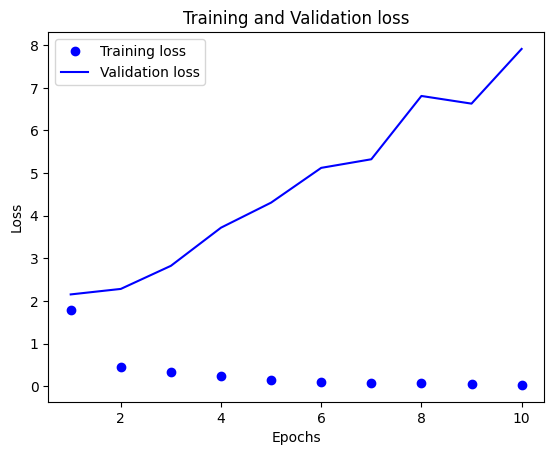

In [16]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

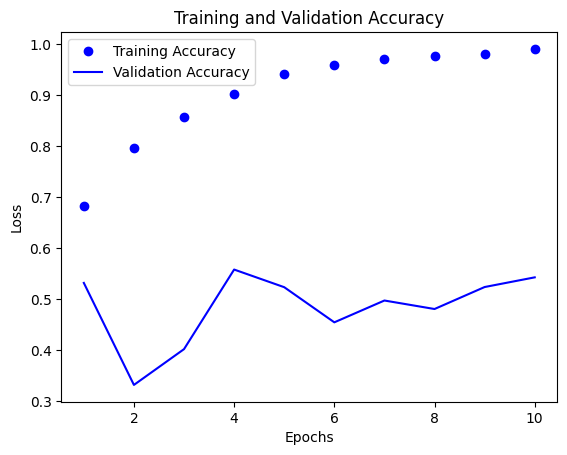

In [17]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see the model is not performong well. This is because of the overfitting. I will use Data Agumentation to improve the results of the model by generalizing more this data

In [18]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

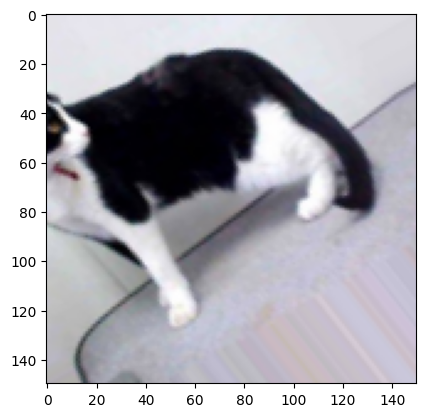

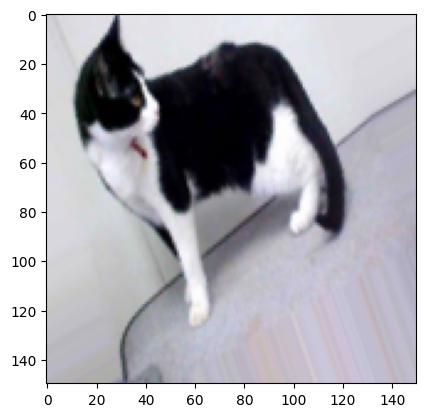

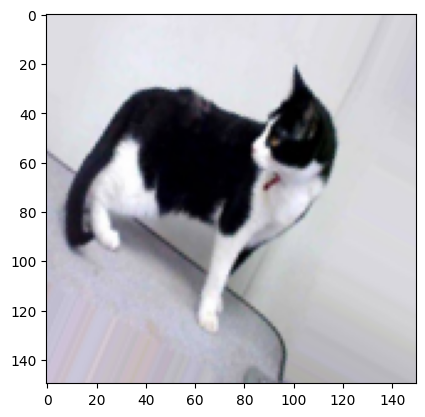

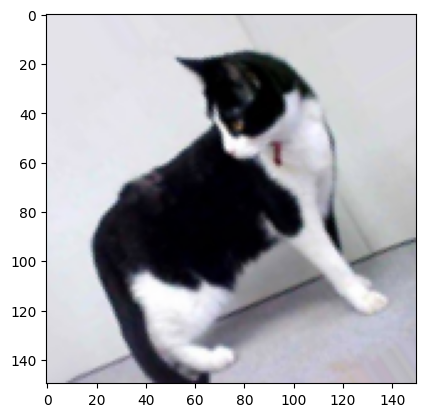

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fnames = [os.path.join(cat_dir, fname) for fname in os.listdir(cat_dir)]
img_path = fnames[8] # Choose one image to augment

img = Image.open(img_path)
img = img.resize((150, 150))  # Resize the image to the desired target size
x = np.array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(Image.fromarray(np.uint8(batch[0])))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='sigmoid'))

In [21]:
model2.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics= ['accuracy'])

In [22]:
history = model2.fit(trdata, epochs=10, validation_data=tsdata)


Epoch 1/10
782/782 [==============================] - 64s 78ms/step - loss: 2.2935 - accuracy: 0.5124 - val_loss: 0.6963 - val_accuracy: 0.9587
Epoch 2/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6939 - accuracy: 0.5262 - val_loss: 0.6952 - val_accuracy: 0.0122
Epoch 3/10
782/782 [==============================] - 60s 77ms/step - loss: 0.6884 - accuracy: 0.5285 - val_loss: 0.6998 - val_accuracy: 0.9434
Epoch 4/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6855 - accuracy: 0.5342 - val_loss: 0.6994 - val_accuracy: 0.9408
Epoch 5/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6774 - accuracy: 0.5430 - val_loss: 0.7089 - val_accuracy: 0.8950
Epoch 6/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6701 - accuracy: 0.5575 - val_loss: 0.7340 - val_accuracy: 0.8474
Epoch 7/10
782/782 [==============================] - 60s 77ms/step - loss: 0.6536 - accuracy: 0.5788 - val_loss: 0.7674 - val_accuracy:

In [23]:
model2.save('/content/Deep-Learning_Project/models/model2_cat_vs_dogs.h5')

In [24]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

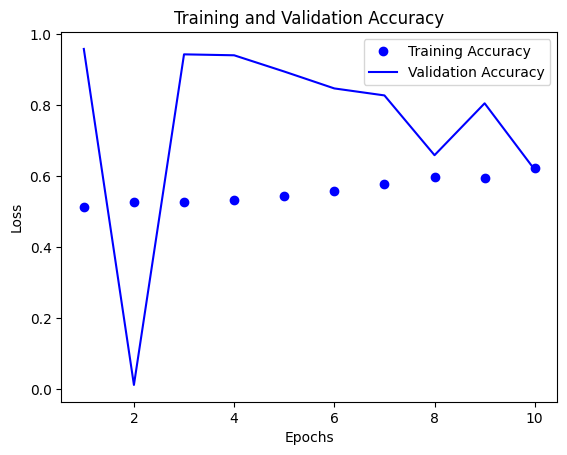

In [25]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

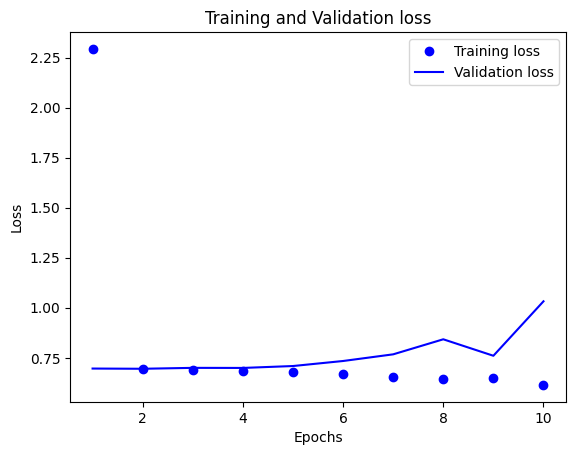

In [26]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see, model 2 seems to be the better choice. It has a decent training accuracy while maintaining a relatively close performance between training and validation sets. Therefore, Model 2 appears to be the better option